# Data Scientist Associate Practical Exam

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

The dataset contains **765 rows and 9 columns** where the average age can be younger than 14. I have validated all the columns against the criteria in the dataset table, none of the columns have missing values:

- Day of Week: Same as description 
- Time: Same as description
- Class Category: Same as description
- Class Capacity: First changed the value '26' to '25', then change the type to 'bool'. 15=0, 25=1
- Days Before: Same as description
- Attendance: Same as description
- Age: Dropped the rows where age was less than 14
- New Students: Same as description
- Over 6 months Members: Same as description

After the data validation, the dataset contains **762 rows and 9 columns.**


In [33]:
#import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# Import Dataset

df = pd.read_csv("data/fitness_class.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     765 non-null    object 
 1   time            765 non-null    object 
 2   class_category  765 non-null    object 
 3   class_capacity  765 non-null    int64  
 4   days_before     765 non-null    int64  
 5   attendance      765 non-null    int64  
 6   age             765 non-null    float64
 7   new_students    765 non-null    int64  
 8   over_6_month    765 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 53.9+ KB


In [34]:
df.head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


In [35]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Removing rows smaller than the age of 14
df2 = df.drop(df.loc[df['age'] < 14].index)

# Convert class capacity from 26 to 25 and change it to 0 and 1 for analysis. 

df2.loc[df['class_capacity']==26, 'class_capacity']=25
df2.loc[df['class_capacity']==15, 'class_capacity']=0

# Change variables' types for analysis
df2['class_capacity'] = df2['class_capacity'].astype('bool')

#Check updated dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     762 non-null    object 
 1   time            762 non-null    object 
 2   class_category  762 non-null    object 
 3   class_capacity  762 non-null    bool   
 4   days_before     762 non-null    int64  
 5   attendance      762 non-null    int64  
 6   age             762 non-null    float64
 7   new_students    762 non-null    int64  
 8   over_6_month    762 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 54.3+ KB


In [36]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

#Change True and False for class_capacity. Class of 15 will equal true
df2['class_capacity'] = df2['class_capacity'].replace({True: 1, False:0 })

# Table 1
df2.describe(include = 'all')


,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
count,762,762,762,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
unique,7,2,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Thu,PM,Yoga,NaN,NaN,NaN,NaN,NaN,NaN
freq,126,395,173,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.250656,2.547244,9.519685,29.163648,5.912073,7.565617
std,NaN,NaN,NaN,0.433676,1.355768,3.841164,5.812547,1.788821,1.968617
min,NaN,NaN,NaN,0.000000,1.000000,4.000000,14.000000,1.000000,2.000000
25%,NaN,NaN,NaN,0.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,NaN,NaN,NaN,0.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,NaN,NaN,NaN,0.750000,4.000000,11.000000,33.200000,7.000000,9.000000


In [37]:
df2. head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,0,1,8,31.1,6,4
1,Sun,PM,Aqua,0,3,8,27.0,7,8
2,Mon,AM,Aqua,0,5,10,22.4,8,7
3,Sun,PM,Strength,1,3,18,23.5,7,9
4,Mon,AM,Yoga,0,5,10,29.8,5,7


In [38]:
#Double Checking if the unique values match the Criteria

print(df2['day_of_week'].unique())
print(df2['time'].unique())
print(df2['class_category'].unique())
print(df2['class_capacity'].unique())

['Wed' 'Sun' 'Mon' 'Tue' 'Thu' 'Sat' 'Fri']
['AM' 'PM']
['Yoga' 'Aqua' 'Strength' 'HIIT' 'Cycling']
[0 1]


In [39]:
# Checking missing values

df2.isnull().values.any()

False

## Exploratory Analysis

From **Graph 2 (Response) and 4** we see some outliers. We will not remove the outliers since they are not clearly wrong inputs by the data collection process, and that they could provide valuable information about the data. From **graphs 6-9**, we can see the different distributions of attendance by classes. Nothing clearly sticks out. We can see the differences when we strata the response variable by different covariates, but would need to consider all continuous variables as predictors. 

From investigating the **pairplot (Graph 10) and Table 2**, we can see that all variables might be a good indicator for predication. All variables have a positive correlation to 'Attendance', but 'Age' is strongly negatively correlated. We want to consider all variables as predictors, because we do not know yet which one causes the attendance to be low. We have to consider the time, class type, day of week, and days before the class sign up fills up.

I have made the following changes for model fitting:

- Change 'Class Capacity' to 0 and 1 (Code Above)
- Converted all the categorical variables into numeric variables (Dummy Variables- Code Below)



### Creating boxplots to show the distribution of continuous variables

[Text(0.5, 1.0, 'Graph 2 The Distribution of Target Variable - Attendance')]

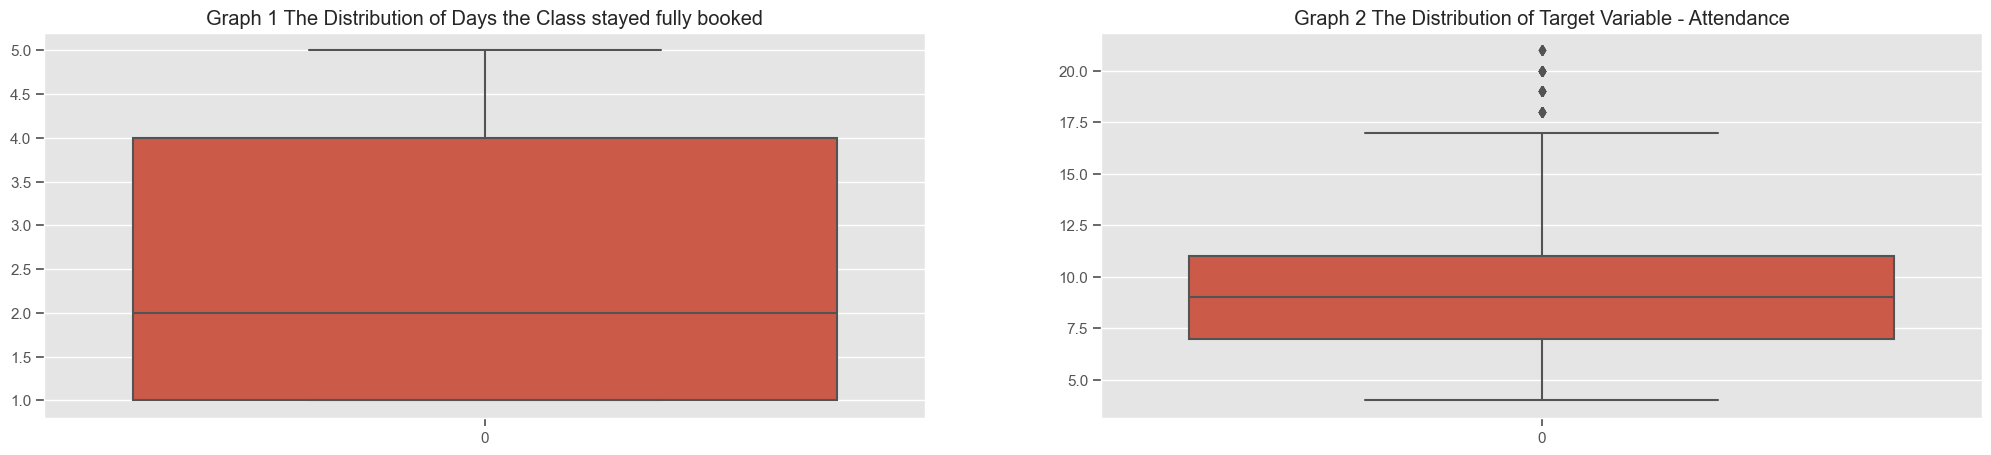

In [40]:
style.use('ggplot')
fig, axes = plt.subplots(1,2,figsize=(25,5))
sns.boxplot(df2['days_before'],ax=axes[0]).set(title='Graph 1 The Distribution of Days the Class stayed fully booked')
sns.boxplot(df2['attendance'],ax=axes[1]).set(title='Graph 2 The Distribution of Target Variable - Attendance')

[Text(0.5, 1.0, 'Graph 5 The Distribution of Members over 6 Months')]

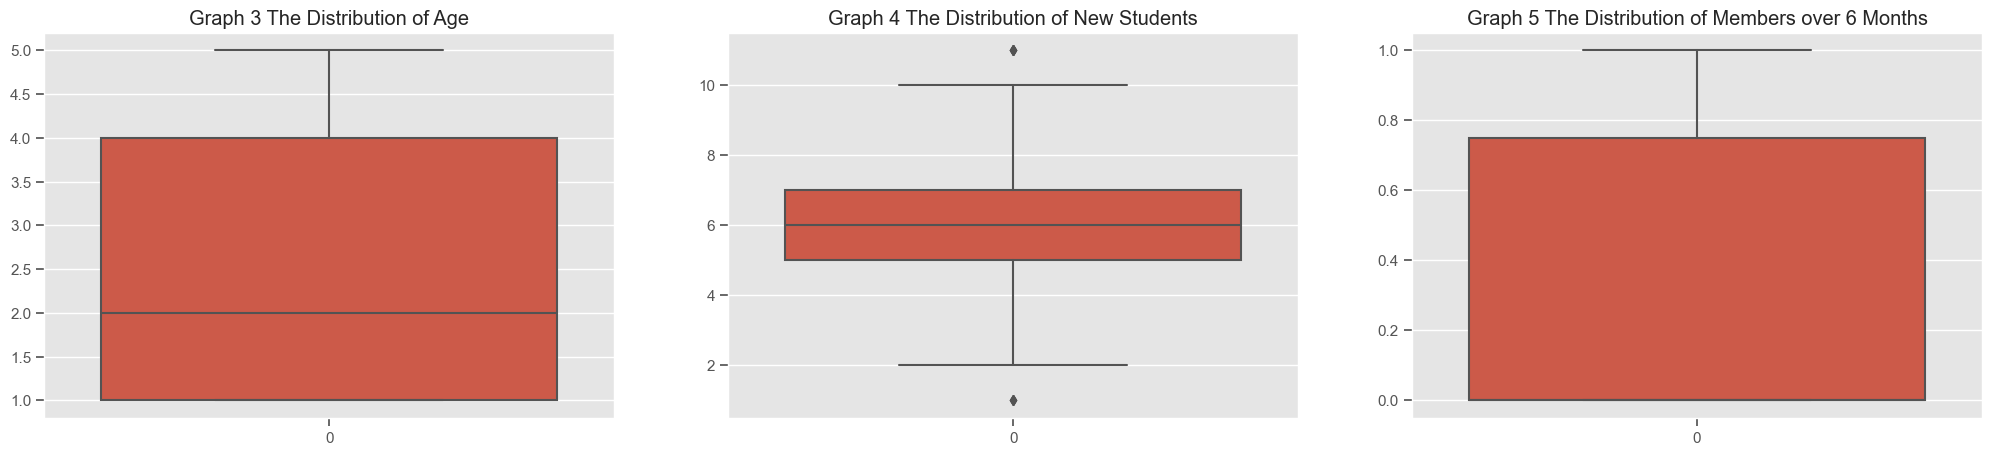

In [41]:
style.use('ggplot')
fig, axes = plt.subplots(1,3,figsize=(25,5))
sns.boxplot(df2['days_before'],ax=axes[0]).set(title='Graph 3 The Distribution of Age')
sns.boxplot(df2['new_students'],ax=axes[1]).set(title='Graph 4 The Distribution of New Students')
sns.boxplot(df2['class_capacity'],ax=axes[2]).set(title='Graph 5 The Distribution of Members over 6 Months')


### Inspecting the Attendance variable by Class Category/Time/Day of Week/Class Size

Text(0.5, 1.0, 'Graph 6: The Distribution of Attendence by Class Category')

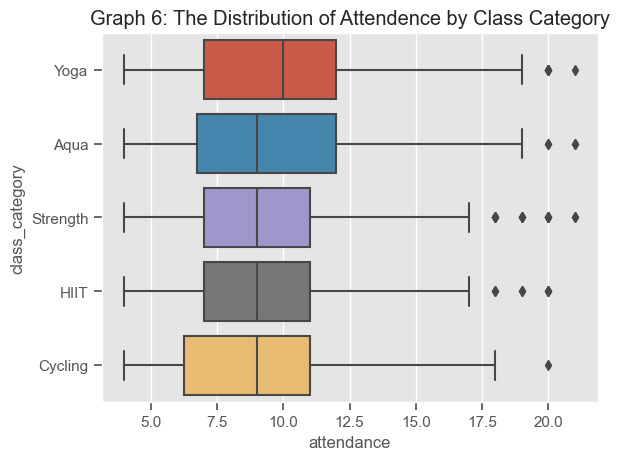

In [42]:
# Boxplot of Attendence by Class Category
sns.boxplot(data=df2, x="attendance", y= "class_category", width=0.8)
plt.title("Graph 6: The Distribution of Attendence by Class Category")

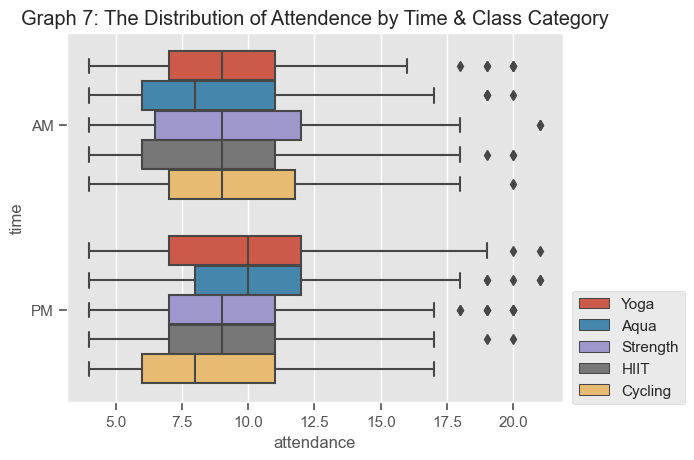

In [43]:
# Boxplot of Attendence by Time & Class Category
sns.boxplot(data=df2, x="attendance", y="time", width=0.8, hue="class_category")
plt.title("Graph 7: The Distribution of Attendence by Time & Class Category")
plt.legend(bbox_to_anchor=(1.02, 0.3), loc='upper left', borderaxespad=0)

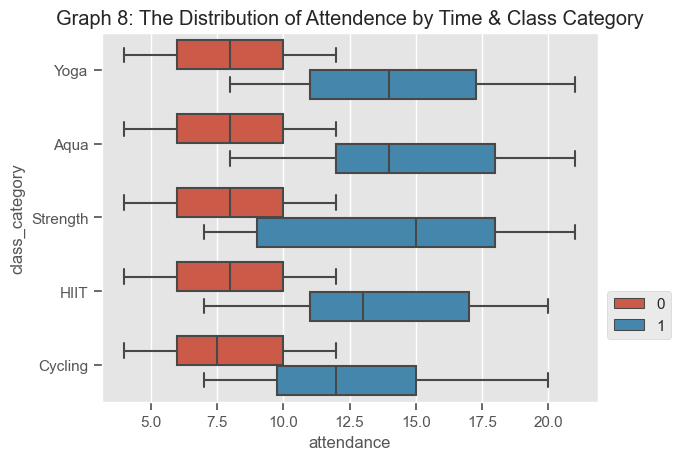

In [44]:
# Boxplot of Attendence by Class Size (0= Class of 15) & Class Category
sns.boxplot(data=df2, x="attendance", y="class_category", width=0.8, hue="class_capacity")
plt.title("Graph 8: The Distribution of Attendence by Time & Class Category")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.3), borderaxespad=0)

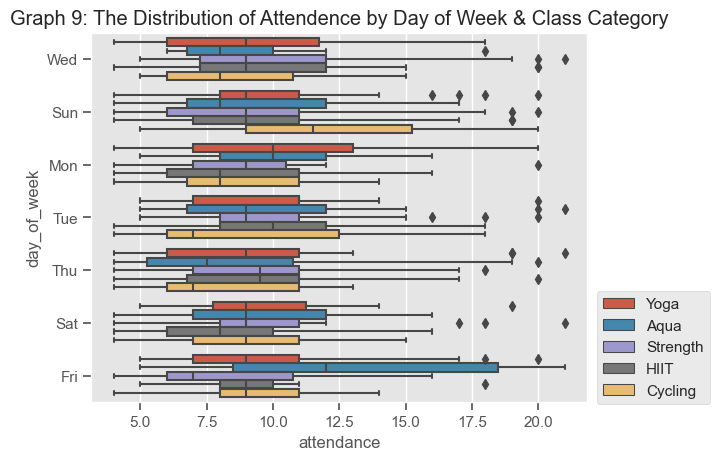

In [45]:
# Boxplot of Attendence by Day of Week and Class Category
sns.boxplot(data=df2, x="attendance",  y="day_of_week", width=0.8, hue="class_category")
plt.title("Graph 9: The Distribution of Attendence by Day of Week & Class Category")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.3), borderaxespad=0)

### Pairplot for Correlation and Normality

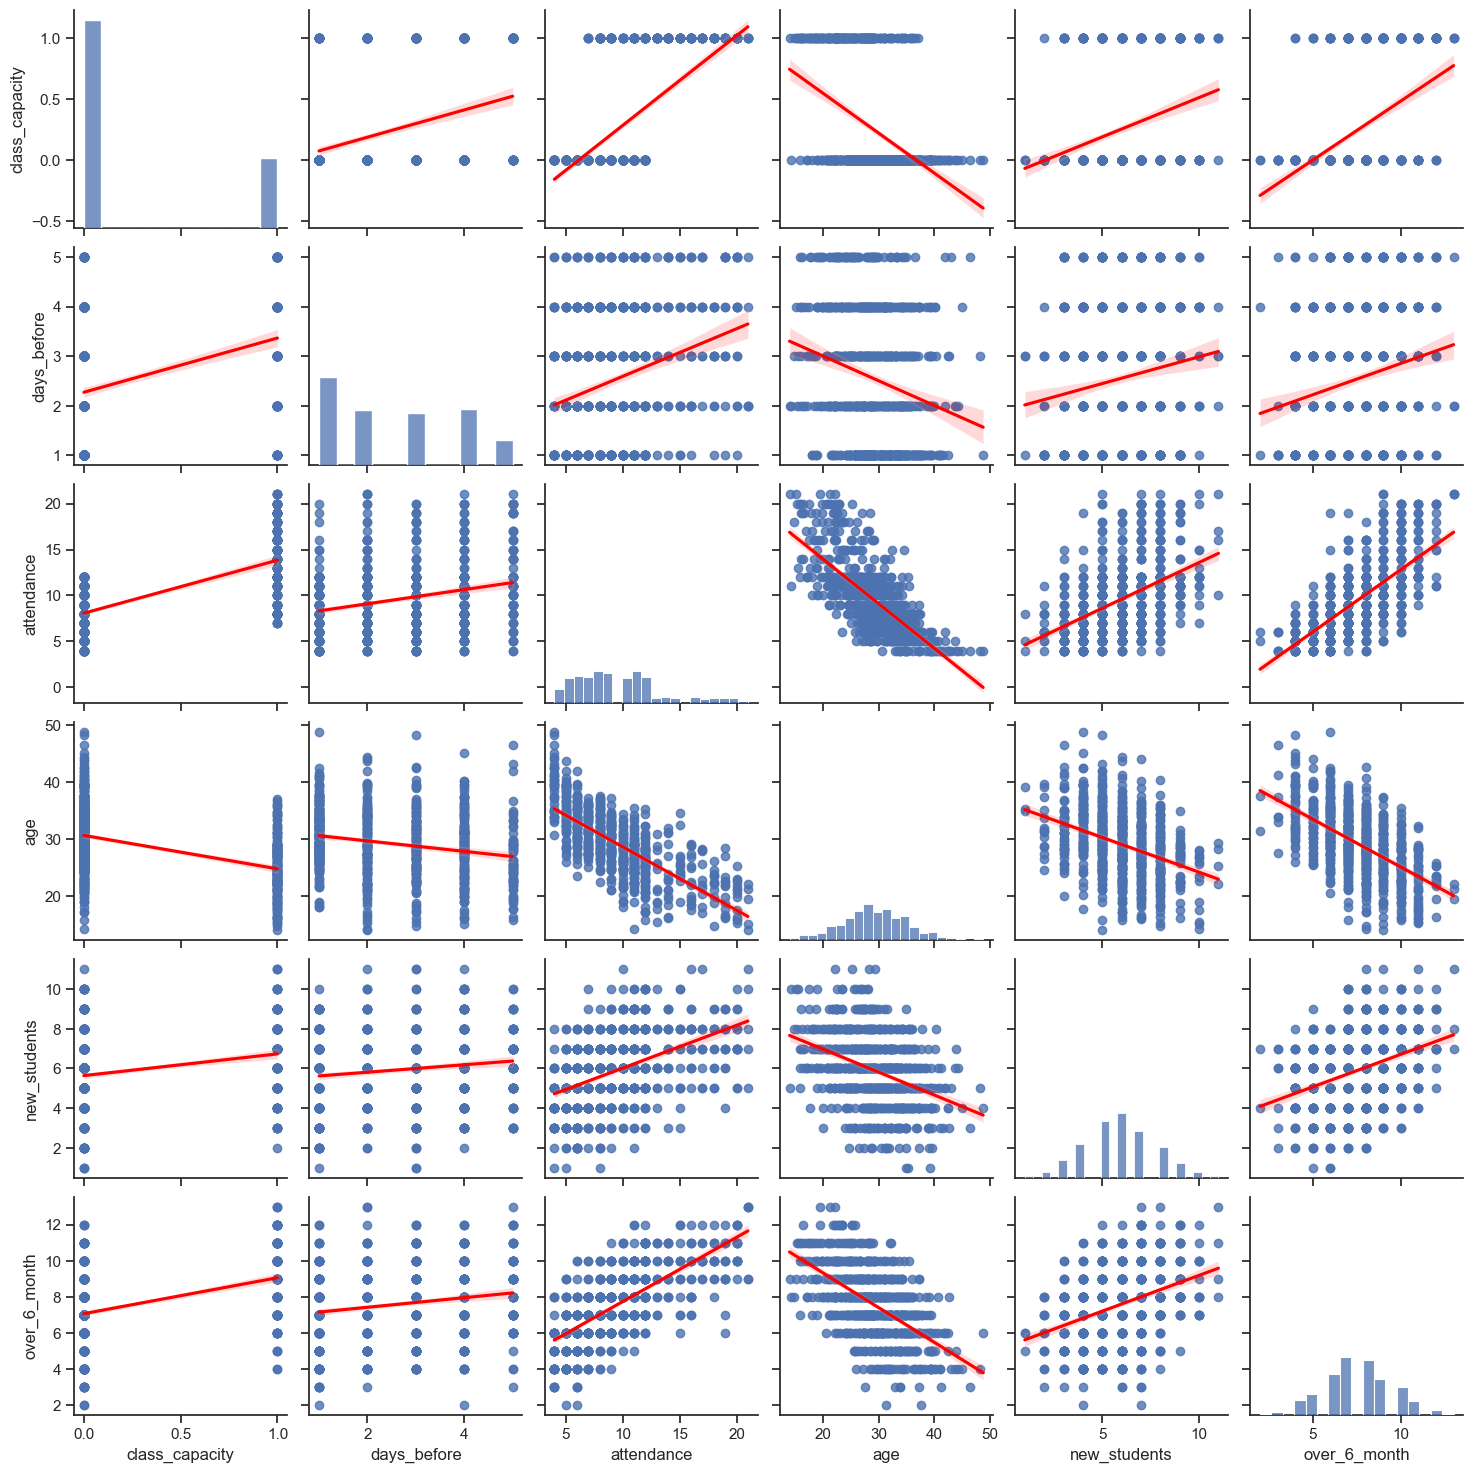

In [46]:
# Pairplot graph 10
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df2, kind="reg",plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [47]:
# R-squared values Table 2
cormat = df2.corr()
round(cormat,2)

,class_capacity,days_before,attendance,age,new_students,over_6_month
class_capacity,1.00,0.35,0.65,-0.44,0.27,0.44
days_before,0.35,1.00,0.27,-0.21,0.14,0.18
attendance,0.65,0.27,1.00,-0.73,0.46,0.69
age,-0.44,-0.21,-0.73,1.00,-0.38,-0.57
new_students,0.27,0.14,0.46,-0.38,1.00,0.36
over_6_month,0.44,0.18,0.69,-0.57,0.36,1.00


## Model Fitting

Predicting the **Attendance Rate** for each fitness class is a regression problem because it involves predicting a continuous numerical value based on various factors. I am choosing the **Linear Regression Model** as a baseline model because it is a good and a simple model to interpret when you have a continuous variable that is linearly related to your predictor variables. Additionally, linear regression is an efficient method for estimating the relationship between variables, and it can be used for both hypothesis testing and prediction. The comparison model I am choosing is the **Decision Tree Regression Model** because it well suited for non-linear relationships and handling outliers. It can make reliable predictions even when there is a lot of variance in the data.



### Model 1: Linear Regression Model

In [48]:
# Model Fitting
# Choose and fit a baseline model: Linear Regression Model
# Choose and fit a comparison model: Decision Tree Regression

#import ML models and peformance metrics
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

# Creating Covariates for Models
X = df2[['day_of_week', 'time', 'days_before', 'class_category', 'age', 'class_capacity', 'new_students', 'over_6_month']]
X = pd.get_dummies(data=X, drop_first=True)
X.head(10)


,days_before,age,class_capacity,new_students,over_6_month,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,class_category_Cycling,class_category_HIIT,class_category_Strength,class_category_Yoga
0,1,31.1,0,6,4,0,0,0,0,0,1,0,0,0,0,1
1,3,27.0,0,7,8,0,0,1,0,0,0,1,0,0,0,0
2,5,22.4,0,8,7,1,0,0,0,0,0,0,0,0,0,0
3,3,23.5,1,7,9,0,0,1,0,0,0,1,0,0,1,0
4,5,29.8,0,5,7,1,0,0,0,0,0,0,0,0,0,1
5,4,28.7,0,4,7,0,0,0,0,1,0,1,0,1,0,0
6,2,32.5,1,5,9,0,0,0,0,1,0,0,0,0,0,0
7,1,36.0,0,5,7,0,0,1,0,0,0,1,0,1,0,0
8,2,15.3,1,8,11,0,0,0,0,0,1,1,0,0,1,0
9,3,31.3,0,4,6,0,0,0,1,0,0,1,0,0,0,0


In [49]:
# Attendance as Response Variable
y = df2['attendance']

# Split the data into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()

# Train/fit Linear Model on the Training data
lm.fit(X_train, y_train)

# Creating Predictions
predictions = lm.predict(X_test)
predictions

array([ 7.39204517,  9.08680711,  7.85876469,  4.44376069, 14.05030212,
        6.03548109,  9.22718409,  9.18549803,  3.71502218, 13.82234019,
        8.20652123, 16.56693023, 10.2128974 ,  9.68581002,  3.7152658 ,
        9.48466571, 14.04607176, 14.94072344,  9.29140328, 12.74335493,
       12.85292894, 12.81025328, 12.61505227, 15.83750185,  5.79657499,
        8.8350663 , 10.59056045,  9.05633379, 10.71432152,  5.00994671,
       14.36896321,  6.44296962, 12.44721241,  2.01752497, 11.79967228,
        6.64930304,  7.25219081, 14.42806278,  6.80727768, 13.43402921,
        7.89166642,  7.64609761,  7.95138985,  6.72469822,  7.92050039,
        8.66517589,  8.36702514,  6.52663862,  5.60488555, 15.55233037,
        7.43574673,  7.86144182, 12.00327094,  5.68460728,  4.23019018,
        9.32461167,  4.55026942, 12.26274958, 10.83293101,  6.81220031,
        5.91052333,  7.26470114,  7.1488359 ,  9.02913725,  9.47905888,
       10.24306038, 12.25641326,  6.89078096, 15.79710476,  7.96

Text(0, 0.5, 'Predicted Y')

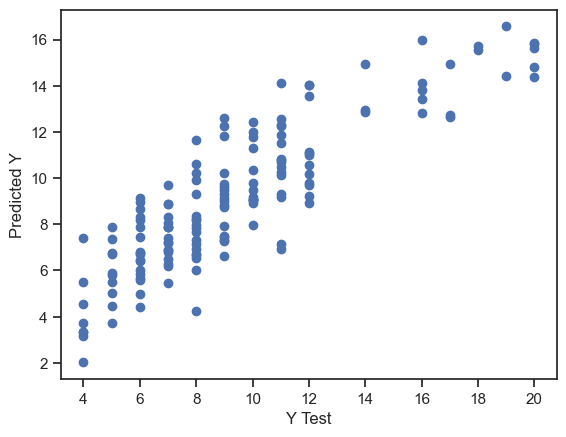

In [50]:
# Graphing Predictions
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [51]:
# Import Metrics package from sklearn
from sklearn import metrics

# Evaluating models by MAE, MSE, and RMSE
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.5120080742845494
MSE: 3.7245359543175702
RMSE: 1.929905685342569


In [52]:
# Creating table to show OLS Regression Results to see how well the model fit. 
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:             attendance   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.11e-168
Time:                        21:21:28   Log-Likelihood:                -1255.1
No. Observations:                 609   AIC:                             2544.
Df Residuals:                     592   BIC:                             2619.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model 2: Decision Tree Regression

In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([ 5., 12.,  4.,  5., 18.,  5.,  6.,  9.,  4.,  9.,  8., 19.,  8.,
        9.,  6., 10., 11., 18., 11., 11.,  9., 12., 10., 18.,  8., 10.,
        8.,  7., 10.,  5., 12.,  7., 12.,  4., 11.,  5.,  5., 19.,  7.,
       11.,  8., 10., 11.,  8., 10.,  7.,  8.,  6.,  4., 11.,  5.,  9.,
       13.,  4.,  6., 10.,  5., 13., 10.,  5.,  5., 11.,  7., 10.,  5.,
        9.,  8.,  7., 19.,  9.,  8.,  9.,  8.,  8.,  9.,  7., 16.,  9.,
        6., 11.,  9.,  7.,  8., 16.,  8., 18.,  7.,  5., 11.,  9., 10.,
       10.,  8.,  9.,  4.,  7.,  5., 11.,  6., 12.,  7.,  9.,  7.,  8.,
        7.,  5., 16.,  5.,  9.,  8.,  5.,  7.,  5.,  4.,  6., 11.,  5.,
        7.,  6., 11., 10., 11., 10., 10., 12., 10.,  9., 12.,  9., 16.,
       10.,  5.,  4., 10., 13.,  6., 11., 11., 12., 12.,  9.,  4.,  6.,
        9., 10., 19.,  9.,  9., 11.,  6., 16., 11., 16.])

Text(0, 0.5, 'Predicted Y')

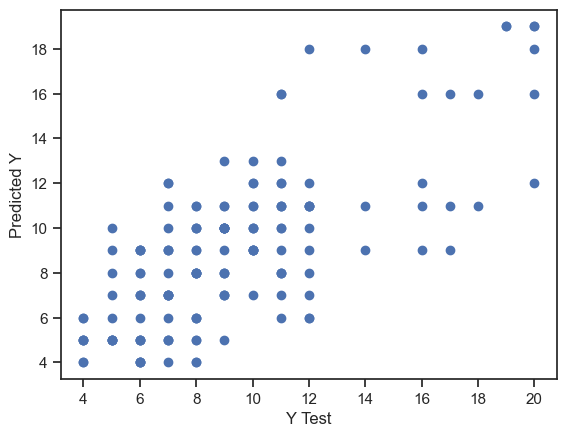

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Model Evaluation

I am choosing **Root Mean Squared Error (RSME)** metric to compare my models. RSME measures the average prediction error and is calculated by taking the square root of the mean of the squared differences between the predicted values and the actual values. It is the measure of goodness for the fit of the model. The lower RMSE means the better the model is at predicting the actual values.

The RSME of the **Linear Regression Model** and **Decision Tree Regression Model** is 1.93 and 2.70. Meaning the **Linear Regression Model** is the better model at predicting the actual values for the attendance rate of a class, because it is on average 1.93 units away from the actual values.

From this metric, we can conclude that the **Linear Regression Model** has a higher chance of that prediction being correct.

In [55]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 1.929905685342569


In [56]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 2.6971299197334875


## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam